In [1]:
import os
from linares_plot import *

In [72]:
### Aprox. 10.000.000 de rows 
### Takes about 40min to load
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_100' ##sliding window of 100
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_10' ##sliding window of 10
path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates'  ##sliding window of 2
files = os.listdir(path_)
frames=[]
for f in files:
    fx=pd.read_excel( os.path.join(path_,f))
    print(f)
    frames.append(fx)
#
df=pd.concat(frames)

1364705.xlsx
1365201.xlsx
1365301.xlsx
1365501.xlsx
1365701.xlsx
1365802.xlsx
1365902.xlsx
1366002.xlsx
1366101.xlsx
1367701.xlsx
1367802.xlsx
1367903.xlsx
1369702.xlsx
1369901.xlsx
1370002.xlsx
1370202.xlsx
1371202.xlsx
1371901.xlsx
1372003.xlsx
1372301.xlsx
1372402.xlsx
189139306.xlsx
1891406.xlsx
1891407.xlsx
189141804.xlsx
1891421.xlsx
1891436.xlsx
189144701.xlsx
189144904.xlsx
189147105.xlsx
189150602.xlsx
189151102.xlsx
189152601.xlsx
189154404.xlsx
189154602.xlsx
189155501.xlsx
189156205.xlsx
189157901.xlsx
189158601.xlsx
1891598.xlsx
189160302.xlsx
189160702.xlsx
189161604.xlsx
1891626.xlsx
189163101.xlsx
189163701.xlsx
189164103.xlsx
189164404.xlsx
189164801.xlsx
189164803.xlsx
189165003.xlsx
1891653.xlsx
189168701.xlsx
189169502.xlsx
189171003.xlsx
189171602.xlsx
189172801.xlsx
189173101.xlsx
189173801.xlsx
189174201.xlsx
189175201.xlsx
189175801.xlsx
189176101.xlsx
189176501.xlsx
189176901.xlsx
189177402.xlsx
189177701.xlsx
1891783.xlsx
189179001.xlsx
189179002.xlsx
1891793.

In [73]:
df.head()

,Unnamed: 0,firing_gauss,times,trial,TDOA,TDconf,targetloc,distLoc,fixationtime,failed,saccadeChoice,cueDuration,distDur,monkey,neuron,brain_region,rf_loc,norm_firing_gauss,time_centered
0,0,0.025193,0,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,0.846866,-500
1,1,0.025486,10,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,0.856722,-490
2,2,0.018175,20,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,0.610950,-480
3,3,0.015012,30,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,0.504622,-470
4,4,0.024514,40,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,0.824021,-460


## LIP

In [74]:
df_control_lip = df.loc[(df['TDconf']==0) & (df['brain_region']=='LIP') ]
df_near_100_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_near_200_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_near_300_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_near_900_lip = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


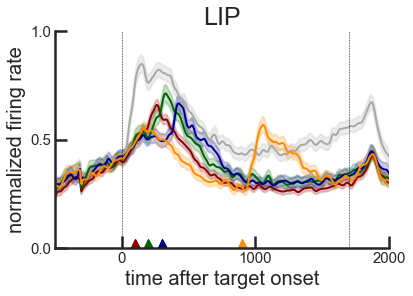

In [75]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_lip, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_lip, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_lip, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_lip, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_lip, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [76]:
df_control_lip = df.loc[(df['TDconf']==0) & (df['brain_region']=='LIP') ]
df_far_100_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_far_200_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_far_300_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_far_900_lip = df.loc[(df['TDconf']==4) & (df['brain_region']=='LIP') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


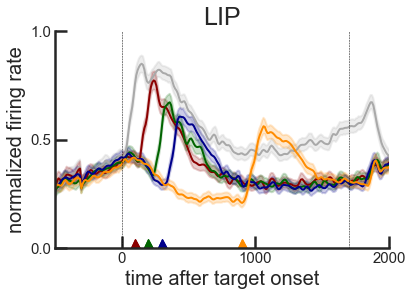

In [77]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_lip, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_100_lip, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_200_lip, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_300_lip, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_900_lip, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

## DLPFC

In [78]:
df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
df_near_100_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_near_200_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_near_300_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_near_900_pfc = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


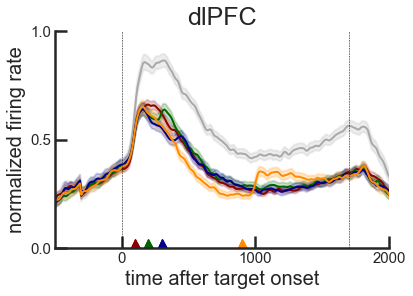

In [79]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_200_pfc, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_300_pfc, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_near_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

In [80]:
df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') ]
df_far_100_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_far_200_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_far_300_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_far_900_pfc = df.loc[(df['TDconf']==4) & (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


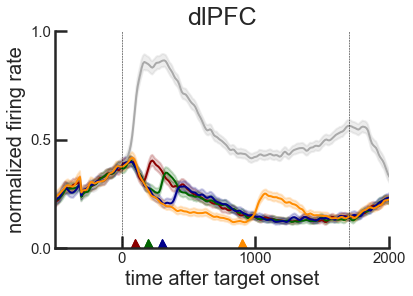

In [81]:
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_100_pfc, color='darkred', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_200_pfc, color='darkgreen', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_300_pfc, color='darkblue', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_far_900_pfc, color='darkorange', linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
#plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([0,0], [0,1], 'k--', linewidth=0.5)
plt.plot([1700,1700], [0,1], 'k--', linewidth=0.5)

plt.plot([100, 100], [0.01,0.01], markersize=15, color='darkred', marker='^')
plt.plot([200, 200], [0.01,0.01], markersize=15, color='darkgreen', marker='^')
plt.plot([300, 300], [0.01,0.01], markersize=15, color='darkblue', marker='^')
plt.plot([900, 900], [0.01,0.01], markersize=15, color='darkorange', marker='^')

### Subset for cross-temporal decoding

In [125]:
def reduce_df(df, w_size=100, max_=2100):
    windows_st = np.arange(0,max_, w_size)
    windows_end = np.arange(w_size, max_+w_size, w_size)
    windows_end
    ####
    frames=[]
    for Neuron in df.neuron.unique():
        df_NE = df.loc[df['neuron']==Neuron]
        for trial in df_NE.trial.unique():
            df_TR = df_NE.loc[df_NE['trial']==trial]
            mean_=[]
            times_=[]
            for idx_, wst in enumerate(windows_st):
                mean_FR = df_TR.loc[(df_TR['times'] >= wst) & (df_TR['times'] < windows_end[idx_]), 'firing_gauss' ].mean()
                mean_.append(mean_FR)
                times_.append(wst)

            dfx = pd.DataFrame({'firing':mean_, 'times':times_})
            dfx['trial']=df_TR.iloc[0].trial
            dfx['TDOA']=df_TR.iloc[0].TDOA
            dfx['TDconf']=df_TR.iloc[0].TDconf
            dfx['targetloc']=df_TR.iloc[0].targetloc
            dfx['distLoc']=df_TR.iloc[0].distLoc
            dfx['fixationtime']=df_TR.iloc[0].fixationtime
            dfx['failed']=df_TR.iloc[0].failed
            dfx['saccadeChoice']=df_TR.iloc[0].saccadeChoice
            dfx['monkey']=df_TR.iloc[0].monkey
            dfx['neuron']=df_TR.iloc[0].neuron
            dfx['brain_region']=df_TR.iloc[0].brain_region
            dfx['rf_loc']=df_TR.iloc[0].rf_loc
            
            ##### convert target_loc to angle (0-360)
            rf = df_TR.iloc[0].rf_loc  ##0-360
            targloc = df_TR.iloc[0].targetloc ##0-7
            if targloc == 0: #receptive field
                angle_target = rf
            else : #displaced ccw
                angle_target = rf + (targloc*45)

            if angle_target>360:
                angle_target = angle_target - 360
            
            dfx['target_angle']=angle_target

            
            
            frames.append(dfx)
        #
    #
    df_reduced=pd.concat(frames)
    return df_reduced


In [126]:
### The conditions I am interested in for the cross-temporal decoding are the 0 and the 1
## T in RF, no D (0)
## T in RF, near D (1) (where I can see more effect of the distractor)

In [129]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD'

In [130]:
### df_control_pfc = df.loc[(df['distLoc']==99) & (df['brain_region']=='DLPFC') ] no interest. In controls target always in RF
df_100_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==0) ]
df_200_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==100) ]
df_300_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==200)]
df_900_pfc = df.loc[ (df['brain_region']=='DLPFC') & (df['TDOA']==800)]

In [131]:
pfc_100 = reduce_df(df_100_pfc)
print('100')
pfc_200 = reduce_df(df_200_pfc)
print('200')
pfc_300 = reduce_df(df_300_pfc)
print('300')
pfc_900 = reduce_df(df_900_pfc)
print('900')

100
200
300
900


In [132]:
pfc_100.to_excel( os.path.join(path_CTD, 'pfc_100.xlsx'))
pfc_200.to_excel( os.path.join(path_CTD, 'pfc_200.xlsx'))
pfc_300.to_excel( os.path.join(path_CTD, 'pfc_300.xlsx'))
pfc_900.to_excel( os.path.join(path_CTD, 'pfc_900.xlsx'))

In [133]:
#df_control_lip = df.loc[(df['distLoc']==99) & (df['brain_region']=='LIP') ]
df_100_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==0) ]
df_200_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==100) ]
df_300_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==200)]
df_900_lip = df.loc[ (df['brain_region']=='LIP') & (df['TDOA']==800)]

In [134]:
lip_100 = reduce_df(df_100_lip)
print('100')
lip_200 = reduce_df(df_200_lip)
print('200')
lip_300 = reduce_df(df_300_lip)
print('300')
lip_900 = reduce_df(df_900_lip)
print('900')

100
200
300
900


In [135]:
lip_100.to_excel( os.path.join(path_CTD, 'lip_100.xlsx'))
lip_200.to_excel( os.path.join(path_CTD, 'lip_200.xlsx'))
lip_300.to_excel( os.path.join(path_CTD, 'lip_300.xlsx'))
lip_900.to_excel( os.path.join(path_CTD, 'lip_900.xlsx'))